In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ahu05 = pd.read_csv('AHU_05.csv')
ahu05 = ahu05.ffill()

In [3]:
ahu05.head()

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10
0,31-12-2015,00:00:00,OFF,4.0,66.8,68.1,15.0,15.0,95.4,18.0
1,31-12-2015,00:00:00,OFF,4.0,66.8,67.9,15.0,15.0,96.1,18.0
2,31-12-2015,00:15:00,OFF,4.0,66.9,67.7,15.0,15.0,96.5,18.0
3,31-12-2015,00:30:00,OFF,4.0,67.0,67.7,15.0,15.0,96.8,18.0
4,31-12-2015,00:45:00,OFF,4.0,67.2,67.9,15.0,15.0,96.6,18.0


In [4]:
ahu05.rename(columns={'Column1':'Date','Column2':'Time','Column3':'supply fan value','Column4':'Cooling coil valve %'},inplace=1)
ahu05.rename(columns={'Column5':'cooling coil discharger temperature','Column6':'Discharger temperature'},inplace=1)
ahu05.rename(columns={'Column7':'Pre-heat coil 1 Discharger valve','Column8':'Pre-heat coil 2 Discharger valve'},inplace=1)
ahu05.rename(columns={'Column9':'Pre-heat coild discharger temperature','Column10':'Re-heat coil Discharger value'},inplace=1)

#print list(df1.columns.values)
ahu05.head()

,Date,Time,supply fan value,Cooling coil valve %,cooling coil discharger temperature,Discharger temperature,Pre-heat coil 1 Discharger valve,Pre-heat coil 2 Discharger valve,Pre-heat coild discharger temperature,Re-heat coil Discharger value
0,31-12-2015,00:00:00,OFF,4.0,66.8,68.1,15.0,15.0,95.4,18.0
1,31-12-2015,00:00:00,OFF,4.0,66.8,67.9,15.0,15.0,96.1,18.0
2,31-12-2015,00:15:00,OFF,4.0,66.9,67.7,15.0,15.0,96.5,18.0
3,31-12-2015,00:30:00,OFF,4.0,67.0,67.7,15.0,15.0,96.8,18.0
4,31-12-2015,00:45:00,OFF,4.0,67.2,67.9,15.0,15.0,96.6,18.0


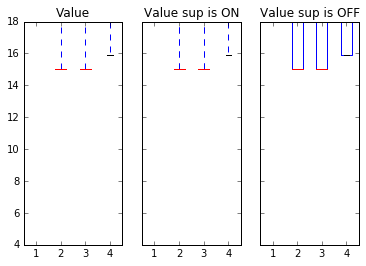

In [8]:
data = [ahu05['Cooling coil valve %'],ahu05['Pre-heat coil 1 Discharger valve'],
        ahu05['Pre-heat coil 2 Discharger valve'],ahu05['Re-heat coil Discharger value']]
sup_on = ahu05[ahu05['supply fan value'].str.contains('ON')]
sup_off = ahu05[ahu05['supply fan value'].str.contains('OFF')]
data_1 = [sup_on['Cooling coil valve %'],sup_on['Pre-heat coil 1 Discharger valve'],
        sup_on['Pre-heat coil 2 Discharger valve'],sup_on['Re-heat coil Discharger value']]
data_2 = [sup_off['Cooling coil valve %'],sup_off['Pre-heat coil 1 Discharger valve'],
        sup_off['Pre-heat coil 2 Discharger valve'],sup_off['Re-heat coil Discharger value']]
f, (ax1,ax2,ax3) = plt.subplots(1,3,sharey = True)
ax1.boxplot(data)
ax1.set_title('Value')
ax2.boxplot(data_1)
ax3.boxplot(data_2)
ax3.set_title('Value sup is OFF')
ax2.set_title('Value sup is ON')
ax2.boxplot(data)
#plt.show()
plt.savefig(''.join(['values%','_ahu_05']))

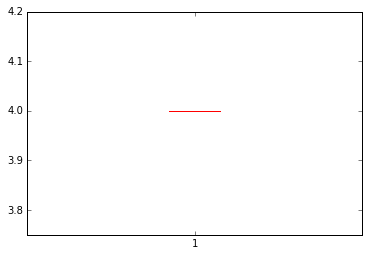

In [8]:
data_ccv = [ahu05['Cooling coil valve %']]
plt.boxplot(data_ccv)
plt.show()


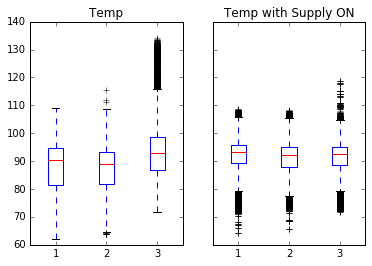

In [10]:
data1 = [ahu05['cooling coil discharger temperature'],ahu05['Discharger temperature'],ahu05['Pre-heat coild discharger temperature']]
data1_1 = [sup_on['cooling coil discharger temperature'],sup_on['Discharger temperature'],sup_on['Pre-heat coild discharger temperature']]
f, (ax1,ax2) = plt.subplots(1,2,sharey = True)
ax1.boxplot(data1)
ax1.set_title('Temp')
ax2.boxplot(data1_1)
ax2.set_title('Temp with Supply ON')
#plt.show()
plt.savefig(''.join(['temperature','_ahu_05']))

In [10]:
print ahu05.columns.values
df1 = ahu05.copy()
df1 = df1.drop(['Date','Time','supply fan value'],1)
print df1.columns.values

['Date' 'Time' 'supply fan value' 'Cooling coil valve %'
 'cooling coil discharger temperature' 'Discharger temperature'
 'Pre-heat coil 1 Discharger valve' 'Pre-heat coil 2 Discharger valve'
 'Pre-heat coild discharger temperature' 'Re-heat coil Discharger value']
['Cooling coil valve %' 'cooling coil discharger temperature'
 'Discharger temperature' 'Pre-heat coil 1 Discharger valve'
 'Pre-heat coil 2 Discharger valve' 'Pre-heat coild discharger temperature'
 'Re-heat coil Discharger value']


C:\Users\MisraSN-PC\Anaconda2\lib\site-packages\matplotlib\axes\_base.py:2787: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=4.0, right=4.0
  'left=%s, right=%s') % (left, right))
C:\Users\MisraSN-PC\Anaconda2\lib\site-packages\matplotlib\axes\_base.py:3045: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=4.0, top=4.0
  'bottom=%s, top=%s') % (bottom, top))


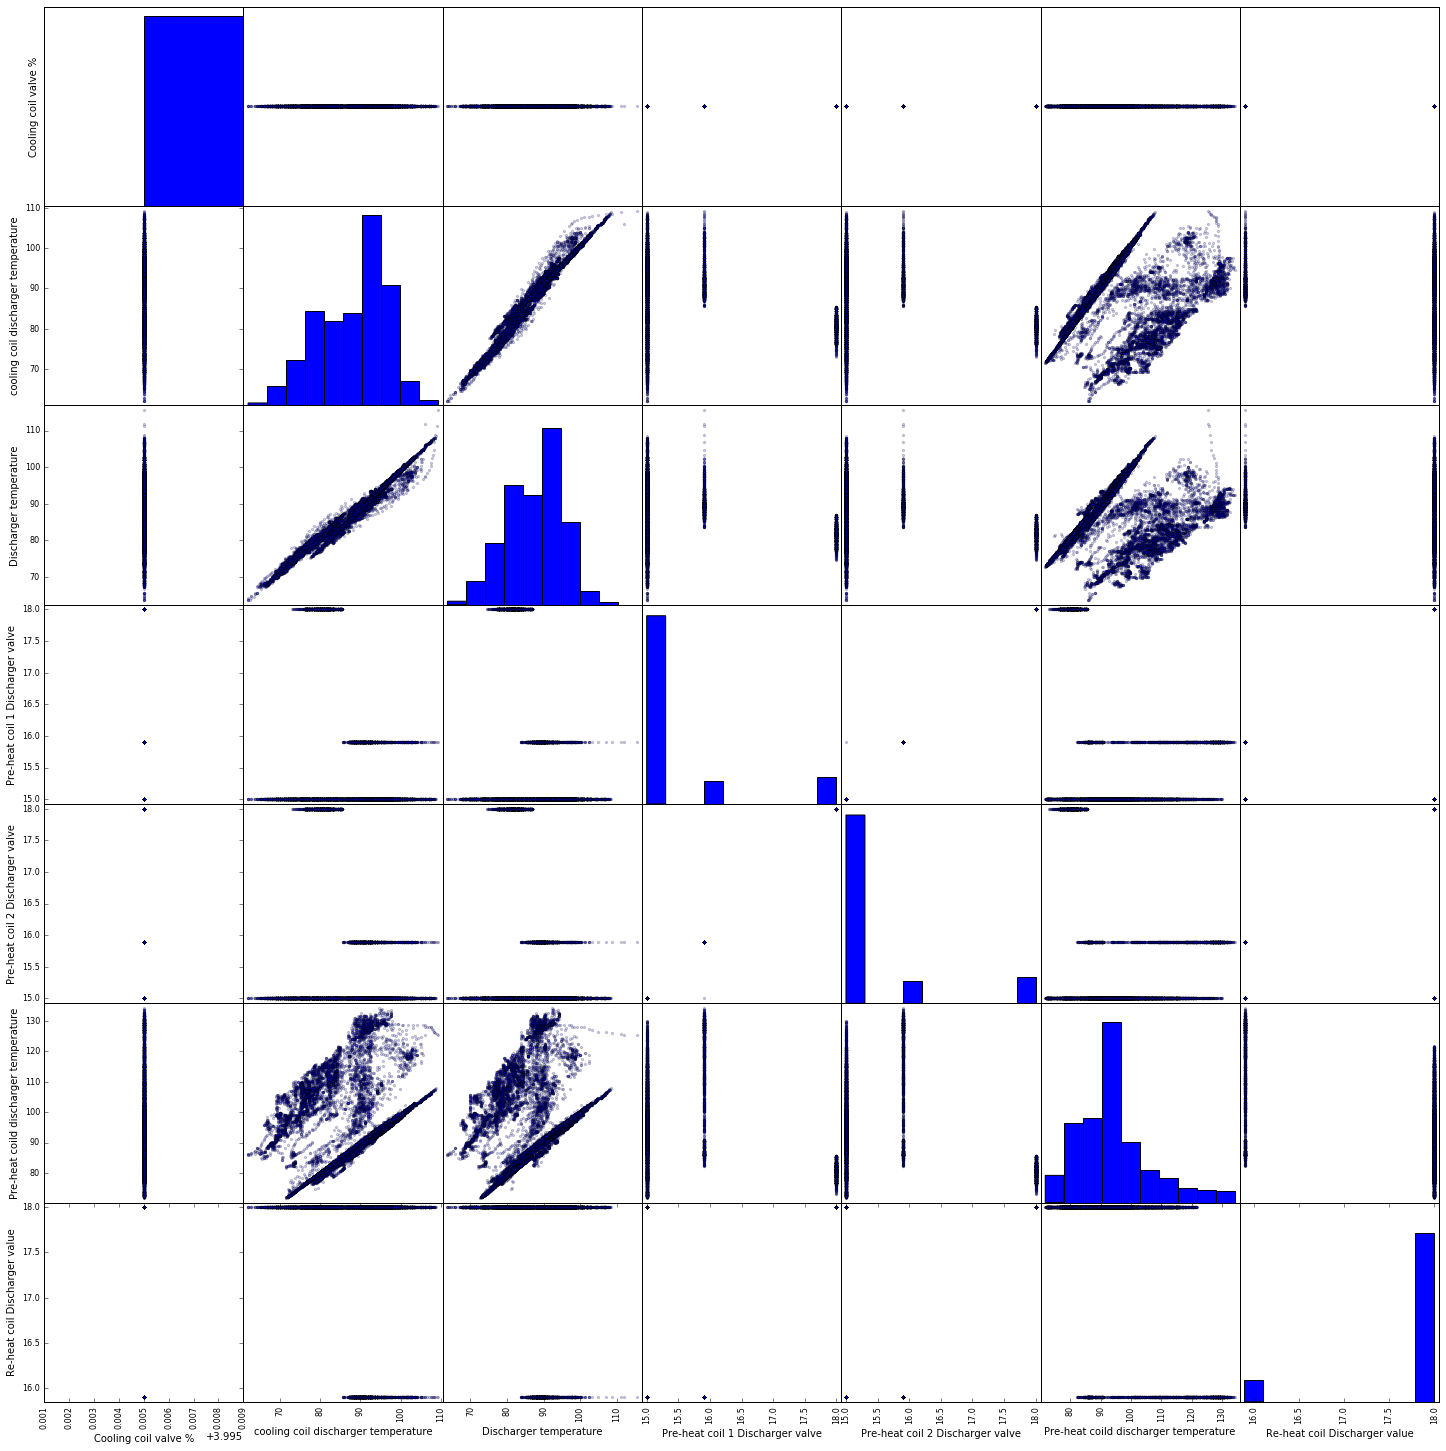

In [11]:
df = pd.scatter_matrix(df1, alpha = 0.2, figsize = (25,25))
plt.savefig(''.join(['bivariate','_ahu_05']))